Titanic 데이터 
=================

데이터 리뷰 (train set)
-------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
import math
import warnings
warnings.filterwarnings('ignore')

from colorama import Fore, Style
from yellowbrick.style import set_palette
set_palette('flatui')

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.float_format', '{:.3f}'.format)

train_data = pd.read_csv('c:/data_bigdata/titanic_train.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId : 승객번호   
Survived : 0 = 사망 / 1 = 생존   
Pclass : 1 = 1st, 2 = 2nd, 3 = 3rd
Name   
Sex   
Age   
SibSp : 동승한 형제 자매의 수   
Parch : 동승한 부모 자녀의 수   
Ticket : 티켓 번호   
Fare : 티켓 운임   
Cabin : cabin 번호   
Embarked : 취항한 항구의 이름 C = Cherbourg, Q = Queenstown, S = Southampton   

In [4]:
train_data.shape, train_data.size

((891, 12), 10692)

In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_data.duplicated().sum() #중복된 항목 확인

0

In [9]:
train_data.nunique() #각각의 항목 개수 확인

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [11]:
a = train_data[train_data.Survived==0].iloc[:,2:].describe().style.background_gradient(cmap='twilight_r')
a.set_properties()

,Pclass,Age,SibSp,Parch,Fare
count,549.000000,424.000000,549.000000,549.000000,549.000000
mean,2.531876,30.626179,0.553734,0.329690,22.117887
std,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.854200
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,39.000000,1.000000,0.000000,26.000000
max,3.000000,74.000000,8.000000,6.000000,263.000000


In [20]:
a = train_data[train_data.Survived==1].iloc[:,2:].describe().style.background_gradient(cmap='twilight_r')
display(a)

,Pclass,Age,SibSp,Parch,Fare
count,342.000000,290.000000,342.000000,342.000000,342.000000
mean,1.950292,28.343690,0.473684,0.464912,48.395408
std,0.863321,14.950952,0.708688,0.771712,66.596998
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,19.000000,0.000000,0.000000,12.475000
50%,2.000000,28.000000,0.000000,0.000000,26.000000
75%,3.000000,36.000000,1.000000,1.000000,57.000000
max,3.000000,80.000000,4.000000,5.000000,512.329200


데이터 리뷰 (test set)
-------------------

In [21]:
test_data = pd.read_csv('c:/data_bigdata/titanic_test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [22]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
test_data.duplicated().sum()

0

In [24]:
test_data.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

상관성 확인
----------------

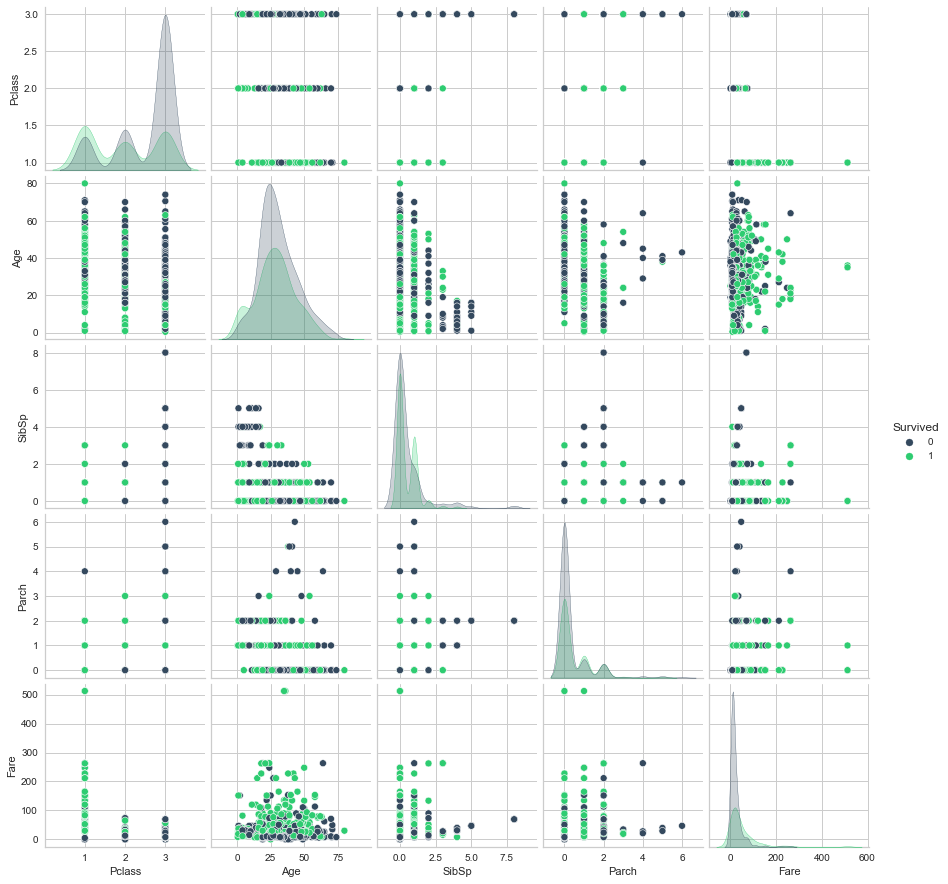

In [36]:
sns.pairplot(train_data.iloc[:,1:],hue='Survived')

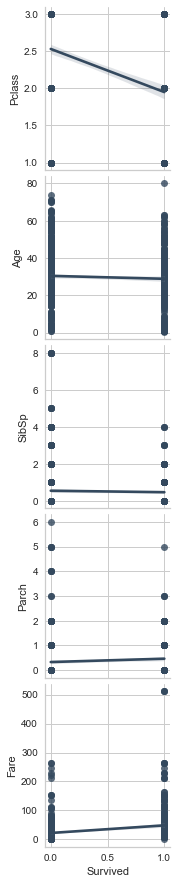

In [149]:
sns.pairplot(train_data,y_vars=['Pclass','Age','SibSp','Parch','Fare'],x_vars='Survived',kind='reg')

<AxesSubplot:>

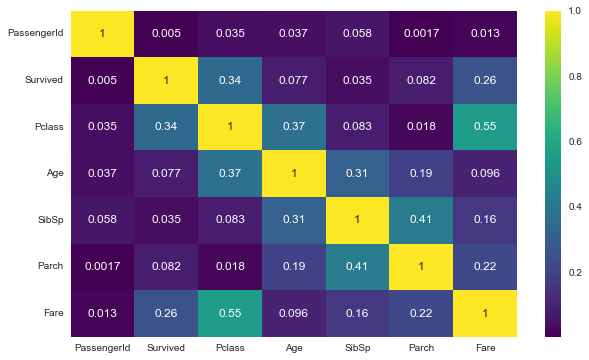

In [13]:
sns.heatmap(abs(train_data.corr()),annot=True,cmap='viridis')

<AxesSubplot:>

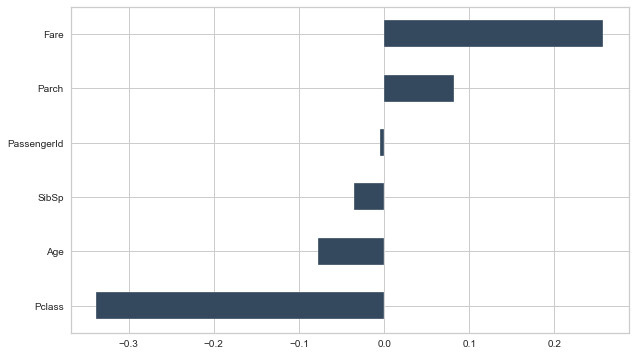

In [42]:
train_data.corr()['Survived'].drop('Survived').sort_values().plot.barh()

이상값 
---------

In [14]:
iqr_factor = [1.5, 2]
list1, list2 = [], []

for factor in iqr_factor:
    count = 0
    print(f'Outliers for {factor} IQR :')
    print('-------------------------------------')
    for col in train_data.select_dtypes(['int64', 'float64']):
       
        IQR = train_data[col].quantile(0.75) - train_data[col].quantile(0.25)
        lower_lim = train_data[col].quantile(0.25) - factor*IQR
        upper_lim = train_data[col].quantile(0.75) + factor*IQR
    
        cond = train_data[(train_data[col] < lower_lim) | (train_data[col] > upper_lim)].shape[0]
        
        if cond > 0 and factor == 1.5:
            list1.append(train_data[(train_data[col] < lower_lim) | (train_data[col] > upper_lim)].index.tolist())
        elif cond > 0 and factor == 2:
            list2.append(train_data[(train_data[col] < lower_lim) | (train_data[col] > upper_lim)].index.tolist())
        
        if cond > 0: print(f'{col:<30} : ', cond); count += cond
    print(f'\n{Fore.GREEN}TOTAL OUTLIERS FOR {factor} IQR : {count}{Style.RESET_ALL}')
    print('')


Outliers for 1.5 IQR :
-------------------------------------
Age                            :  11
SibSp                          :  46
Parch                          :  213
Fare                           :  116

TOTAL OUTLIERS FOR 1.5 IQR : 386

Outliers for 2 IQR :
-------------------------------------
Age                            :  2
SibSp                          :  30
Parch                          :  213
Fare                           :  92

TOTAL OUTLIERS FOR 2 IQR : 337



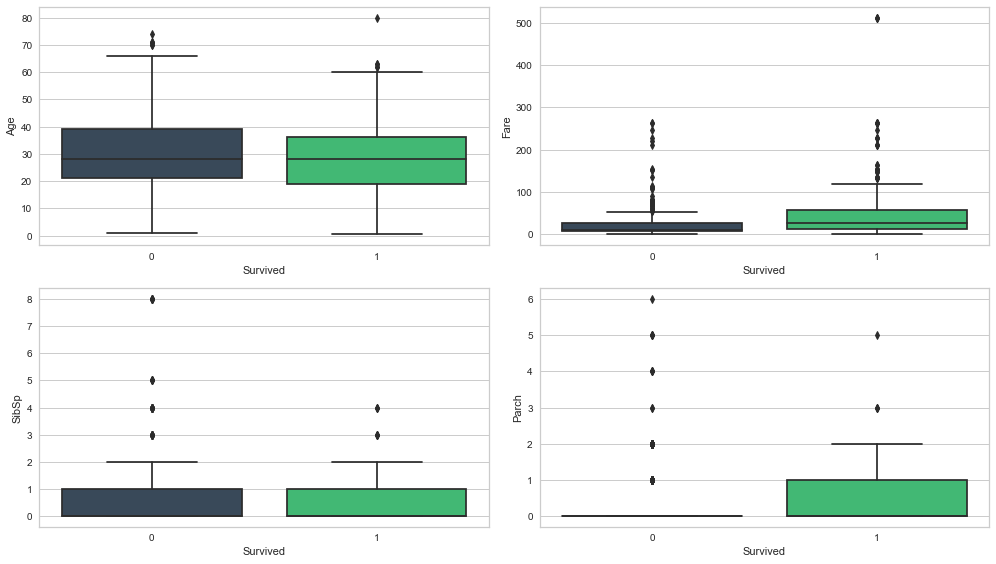

In [16]:
fig, ax = plt.subplots(2,2, figsize=(14,8))
ax = ax.flatten() #ax를 평평하게
for i,j in enumerate(['Age','Fare','SibSp','Parch']): #인덱스와 문자 모두 출력
    sns.boxplot(data=train_data, x='Survived', y=j, ax=ax[i])

plt.tight_layout();

결측값 처리
-----------

### Pclass

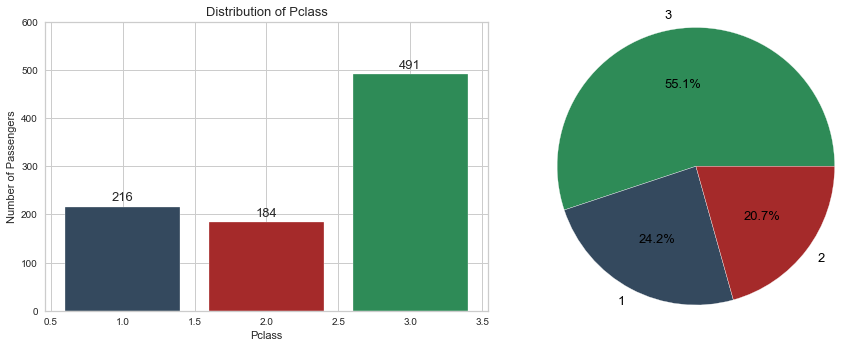

In [45]:
plt.figure(figsize=(13,5))

x = train_data['Pclass'].value_counts().index
y = train_data['Pclass'].value_counts().values

plt.subplot(121)
g = plt.bar(x,y,label='Pclass', color=['seagreen','#34495E', 'brown'])
plt.bar_label(g, padding=3, size=13), plt.ylim(0, 600)

plt.xlabel('Pclass'), plt.ylabel('Number of Passengers') 
plt.title('Distribution of Pclass', size=13)
   
plt.subplot(122)
plt.pie(y, labels=x, autopct='%0.1f%%', radius=1.2, textprops={'color':'black','fontsize': 13}, 
        colors=['seagreen','#34495E', 'brown'])

plt.tight_layout();

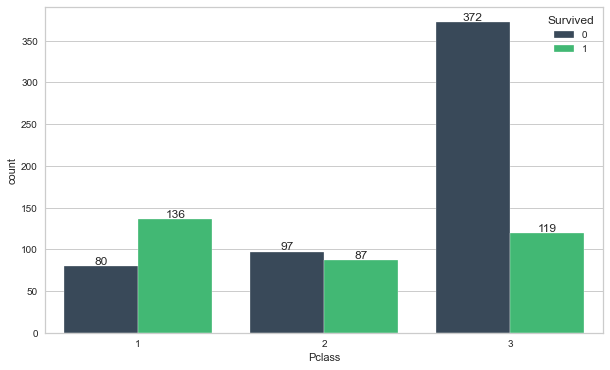

In [58]:
g = sns.countplot(data=train_data, x='Pclass', hue='Survived')
g.bar_label(g.containers[0]), g.bar_label(g.containers[1]); #;입력하면 좌표 텍스트 출력 안됨.

#### sex

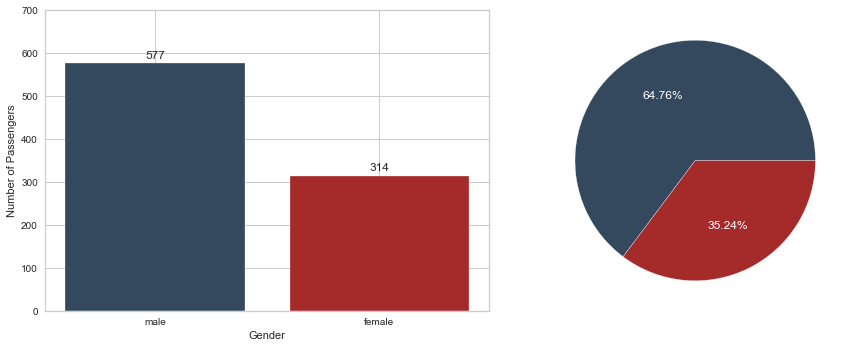

In [63]:
plt.figure(figsize=(13,5))
x = train_data['Sex'].value_counts().index
y = train_data['Sex'].value_counts().values
plt.subplot(121)
g = plt.bar(x,y,label='sex',color=['#34495E', 'brown'])
plt.bar_label(g, padding=3), plt.ylim(0,700)
plt.xlabel('Gender'), plt.ylabel('Number of Passengers')

plt.subplot(122)
plt.pie(y,labels=x,autopct='%0.2f%%',colors=['#34495E', 'brown'],textprops={'color':'white'})
plt.tight_layout()

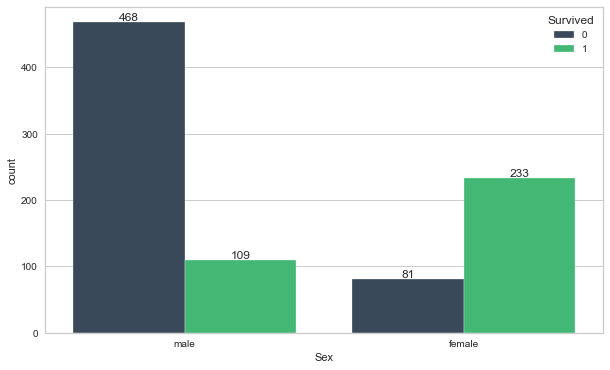

In [65]:
g = sns.countplot(data=train_data, x='Sex', hue='Survived')
g.bar_label(g.containers[0]), g.bar_label(g.containers[1]); 

#### SibSp & Parch

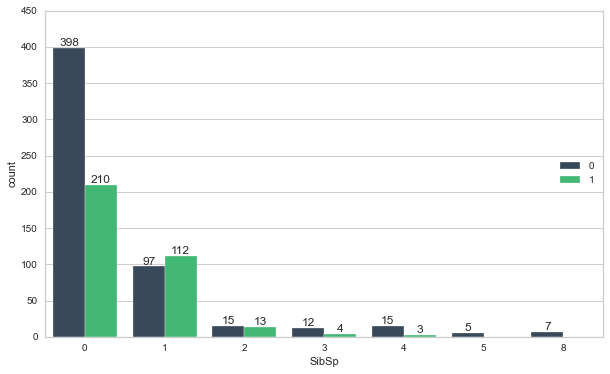

In [69]:
g = sns.countplot(data=train_data, x='SibSp', hue='Survived')
g.bar_label(g.containers[0]), g.bar_label(g.containers[1]); 
g.set_ylim(0,450), plt.legend(loc='right');

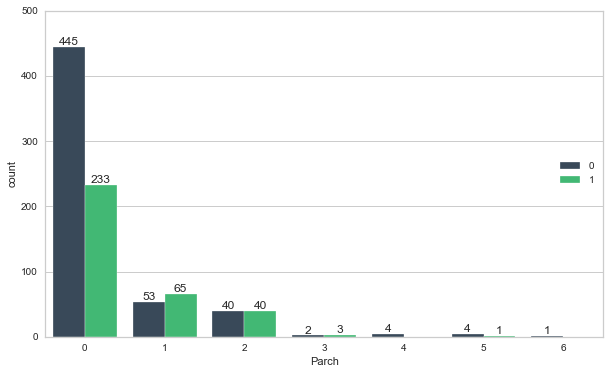

In [70]:
g = sns.countplot(data=train_data, x='Parch', hue='Survived')
g.bar_label(g.containers[0]), g.bar_label(g.containers[1]); 
g.set_ylim(0,500), plt.legend(loc='right');

#### Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

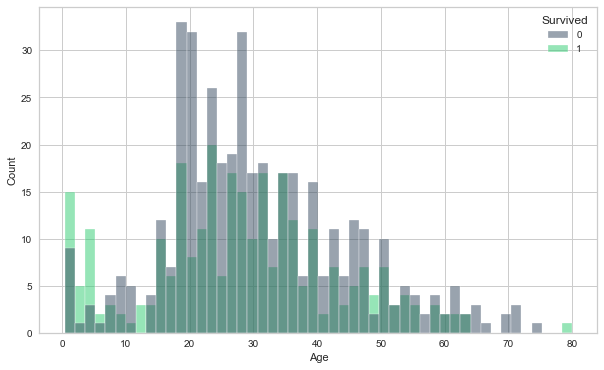

In [71]:
sns.histplot(data=train_data, x='Age', hue='Survived', bins=50)

In [72]:
train_data.Age.isnull().sum()

177

In [74]:
train_data[train_data.Age.isnull()][['SibSp', 'Parch']].describe()

,SibSp,Parch
count,177.000,177.000
mean,0.565,0.181
std,1.626,0.534
min,0.000,0.000
25%,0.000,0.000
50%,0.000,0.000
75%,0.000,0.000
max,8.000,2.000


In [75]:
train_data.groupby(['SibSp']).Age.mean()

SibSp
0   31.398
1   30.090
2   22.620
3   13.917
4    7.056
5   10.200
8      NaN
Name: Age, dtype: float64

In [76]:
train_data.groupby(['SibSp', 'Parch']).Age.mean()

SibSp  Parch
0      0       32.220
       1       29.525
       2       20.993
       3       24.000
       4       29.000
       5       40.000
1      0       32.069
       1       27.065
       2       20.466
       3       39.333
       4       49.667
       5       38.667
       6       43.000
2      0       31.846
       1        8.357
       2       17.250
       3       24.000
3      0       31.500
       1        4.333
       2       13.000
4      1        6.778
       2        7.333
5      2       10.200
8      2          NaN
Name: Age, dtype: float64

In [87]:
train_data.Age.fillna(train_data.groupby(['SibSp','Parch']).Age.transform('mean'), inplace=True)
train_data.Age.fillna(train_data[train_data.SibSp>4].Age.mean(), inplace=True)

In [88]:
test_data.Age.fillna(train_data.groupby(['SibSp','Parch']).Age.transform('mean'), inplace=True)

#### Embarked

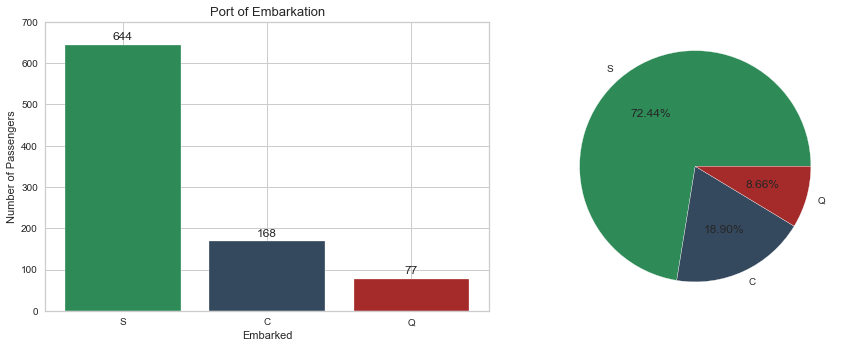

In [100]:
plt.figure(figsize=(13,5))
x = train_data['Embarked'].value_counts().index
y = train_data['Embarked'].value_counts().values

plt.subplot(121)
g = plt.bar(x,y,label='Embarked',color=['seagreen','#34495E', 'brown'])
plt.bar_label(g,padding=3),plt.ylim(0,700);
plt.xlabel('Embarked'), plt.ylabel('Number of Passengers')
plt.title('Port of Embarkation',size=13);

plt.subplot(122)
plt.pie(y,labels=x,autopct='%0.2f%%',colors=['seagreen','#34495E', 'brown'])

plt.tight_layout();


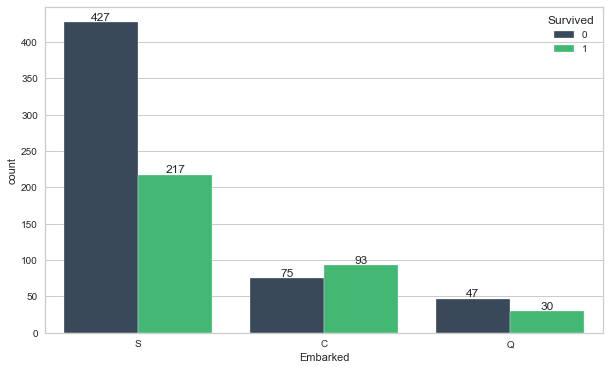

In [101]:
g = sns.countplot(data=train_data, x='Embarked', hue='Survived')
g.bar_label(g.containers[0]), g.bar_label(g.containers[1]);

In [103]:
train_data[train_data.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.000,0,0,113572,80.000,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.000,0,0,113572,80.000,B28,NaN


In [106]:
train_data.groupby(['Embarked', 'Pclass']).Fare.describe().style.background_gradient()

In [110]:
train_data[train_data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.000,0,0,113572,80.000,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.000,0,0,113572,80.000,B28,NaN


In [111]:
train_data[(train_data.Pclass==1) & (train_data.Fare>79) & (train_data.Fare<81)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.000,0,0,113572,80.000,B28,NaN
139,140,0,1,"Giglio, Mr. Victor",male,24.000,0,0,PC 17593,79.200,B86,C
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,32.220,0,0,PC 17585,79.200,NaN,C
262,263,0,1,"Taussig, Mr. Emil",male,52.000,1,1,110413,79.650,E67,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.000,1,1,110413,79.650,E67,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.000,0,2,110413,79.650,E68,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.000,1,1,13567,79.200,B41,C
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.000,0,0,PC 17593,79.200,B82 B84,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.000,0,0,113572,80.000,B28,NaN


In [112]:
train_data.Embarked.fillna('C', inplace=True)

#### Fare

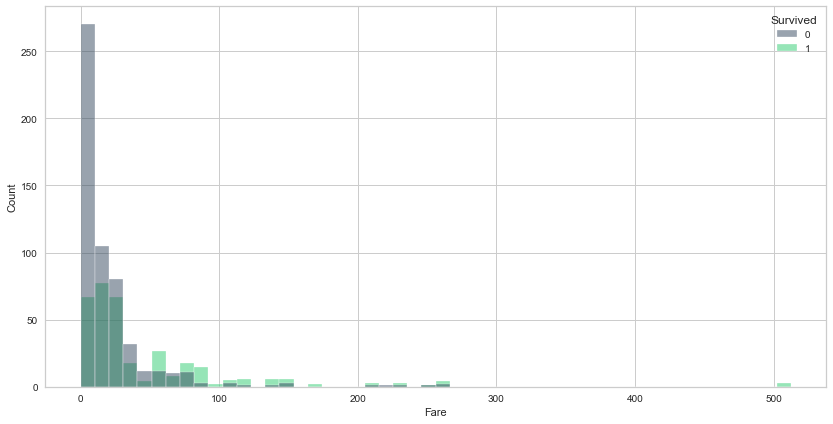

In [114]:
plt.figure(figsize=(14,7))
sns.histplot(data=train_data, x='Fare', hue='Survived', bins=50);

In [115]:
train_data.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.000,22.118,31.388,0.000,7.854,10.500,26.000,263.000
1,342.000,48.395,66.597,0.000,12.475,26.000,57.000,512.329


In [116]:
test_data[test_data.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.500,0,0,3701,NaN,NaN,S


In [117]:
train_data[(train_data.Pclass==3) & (train_data.Embarked=='S')].Fare.mean()

14.64408300283288

In [145]:
train_data.Fare.fillna(train_data[(train_data.Pclass==3) & (train_data.Embarked=='S')].Fare.mean(),inplace=True)
test_data.Fare.fillna(train_data[(train_data.Pclass==3) & (train_data.Embarked=='S')].Fare.mean(),inplace=True)

#### Survived

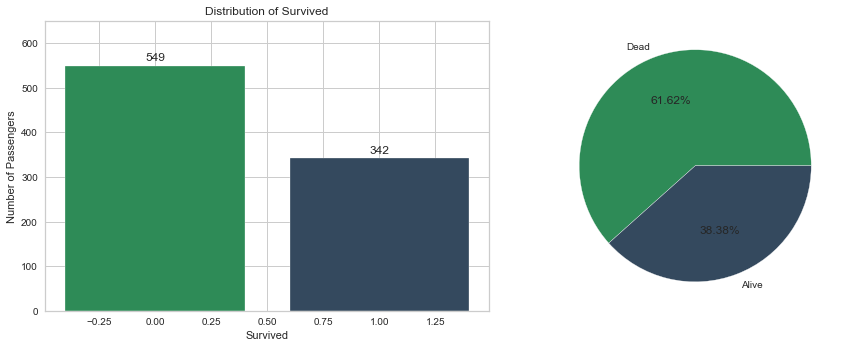

In [134]:
plt.figure(figsize=(13,5))

x = train_data.Survived.value_counts().index
y = train_data.Survived.value_counts().values

plt.subplot(121)
g = plt.bar(x,y,color=['seagreen','#34495E'])
plt.bar_label(g,padding=3),plt.ylim(0,650);
plt.xlabel('Survived'), plt.ylabel('Number of Passengers')
plt.title('Distribution of Survived');

plt.subplot(122)
plt.pie(y,labels=['Dead','Alive'],autopct='%0.2f%%',colors=['seagreen','#34495E']);

plt.tight_layout();

In [138]:
train_data.drop(['PassengerId','Name','Ticket','Cabin'], 1,inplace=True)
test_data.drop(['PassengerId','Name','Ticket','Cabin'],1, inplace=True)

In [146]:
print(train_data.isnull().sum().sum())
print(test_data.isnull().sum().sum())

0
0


데이터 전처리
------------

#### 인코딩을 위한 변환

In [150]:
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [165]:
{column: list(train_data[column].unique()) for column in train_data.select_dtypes('O').columns}

{'Sex': ['male', 'female'], 'Embarked': ['S', 'C', 'Q']}

In [166]:
# for tree-based models
preprocessor1 = ColumnTransformer(transformers=[
    ('enc', OrdinalEncoder(), ['Sex', 'Embarked'])
], remainder='passthrough')

In [168]:
# for KNN
preprocessor2 = ColumnTransformer(transformers=[
    ('enc', OneHotEncoder(), ['Sex', 'Embarked'])
], remainder='passthrough')

In [169]:
preprocessor2

ColumnTransformer(remainder='passthrough',
                  transformers=[('enc', OneHotEncoder(), ['Sex', 'Embarked'])])

#### train,test set split

In [178]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=15)

In [180]:
print("Train features shape : ", X_train.shape)
print("Test features shape  : ", X_test.shape)

Train features shape :  (712, 7)
Test features shape  :  (179, 7)


In [181]:
y_train.value_counts(), y_test.value_counts()

(0    439
 1    273
 Name: Survived, dtype: int64,
 0    110
 1     69
 Name: Survived, dtype: int64)

모델링
-----------

In [184]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import cross_val_score,cross_validate,GridSearchCV

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score

In [185]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))